In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [13]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [14]:
tokenizer = info.features['text'].encoder

In [19]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 47s 121ms/step - loss: 0.4577 - accuracy: 0.7760 - val_loss: 0.3469 - val_accuracy: 0.8577
Epoch 2/10
391/391 [==============================] - 27s 70ms/step - loss: 0.2267 - accuracy: 0.9148 - val_loss: 0.3242 - val_accuracy: 0.8704
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 0.1721 - accuracy: 0.9368 - val_loss: 0.3454 - val_accuracy: 0.8753
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1373 - accuracy: 0.9505 - val_loss: 0.4055 - val_accuracy: 0.8598
Epoch 5/10
391/391 [==============================] - 24s 60ms/step - loss: 0.1110 - accuracy: 0.9616 - val_loss: 0.4375 - val_accuracy: 0.8670
Epoch 6/10
391/391 [==============================] - 23s 59ms/step - loss: 0.0888 - accuracy: 0.9703 - val_loss: 0.4911 - val_accuracy: 0.8622
Epoch 7/10
391/391 [==============================] - 23s 58ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.6015 - val_accuracy

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

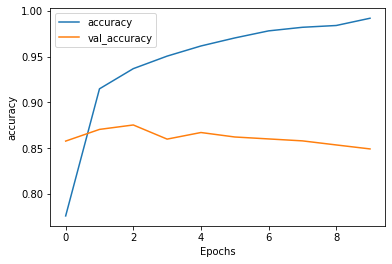

In [26]:
plot_graphs(history, 'accuracy')

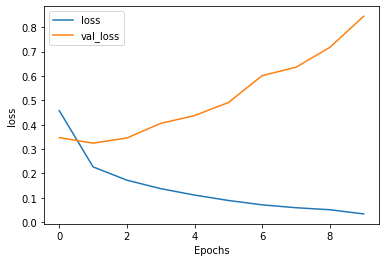

In [27]:
plot_graphs(history, 'loss')